# Project I: Image Classification and Regression


Ramy Ghorayeb, December 2018

## 2. Getting Started

Edits on mp1.py:
- removed the %matplotlib inline from mp1 as it does not work with IPython and added np_utils module importation from keras
- removed the prints in the data generation

In [2]:
from mp1 import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils

## 3. Simple Classification

### Preparation

In [6]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
Data created


In [8]:
from keras.models import Sequential
from keras.layers import Dense

def model_Class():
    model = Sequential()
    model.add(Dense(3,  input_dim = X_train.shape[1], activation='softmax'))
    return model

### SGD Optimizer

We first try to use the SGD optimizer with a simple one layer architecture. As we are in a multiclassification problem, we will use a softmax activation and a categorical crossentropy as the loss function

In [32]:
SGD = model_Class()
SGD.compile(loss='categorical_crossentropy',optimizer="SGD",metrics=['accuracy'])
SGD.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 1s 2ms/step - loss: 8.4409 - acc: 0.3333
Epoch 2/10
300/300 [==============================] - 0s 162us/step - loss: 10.3693 - acc: 0.3567
Epoch 3/10
300/300 [==============================] - 0s 201us/step - loss: 10.3693 - acc: 0.3567
Epoch 4/10
300/300 [==============================] - 0s 145us/step - loss: 10.3693 - acc: 0.3567
Epoch 5/10
300/300 [==============================] - 0s 170us/step - loss: 10.3693 - acc: 0.3567
Epoch 6/10
300/300 [==============================] - 0s 145us/step - loss: 10.3693 - acc: 0.3567
Epoch 7/10
300/300 [==============================] - 0s 208us/step - loss: 10.3693 - acc: 0.3567
Epoch 8/10
300/300 [==============================] - 0s 161us/step - loss: 10.3693 - acc: 0.3567
Epoch 9/10
300/300 [==============================] - 0s 122us/step - loss: 10.3693 - acc: 0.3567
Epoch 10/10
300/300 [==============================] - 0s 164us/step - loss: 10.3693 - acc: 0.3567


By looking at the loss being almost constant, we can see that the model does not seem to converge with the default parameters. Let's tune the optimizer with a /10 learning rate, and a nesterov momentum to accelerate the convergence.

In [33]:
from keras import optimizers

SGD_tuned = model_Class()
sgd_tuned = optimizers.SGD(lr=0.001,momentum= 1.0, nesterov=True)
SGD_tuned.compile(loss='categorical_crossentropy',optimizer=sgd_tuned,metrics=['accuracy'])
SGD_tuned.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 1.3023 - acc: 0.4500
Epoch 2/30
300/300 [==============================] - 0s 245us/step - loss: 0.5651 - acc: 0.7467
Epoch 3/30
300/300 [==============================] - 0s 199us/step - loss: 0.3417 - acc: 0.8600
Epoch 4/30
300/300 [==============================] - 0s 204us/step - loss: 0.1933 - acc: 0.9300
Epoch 5/30
300/300 [==============================] - 0s 252us/step - loss: 0.1179 - acc: 0.9867
Epoch 6/30
300/300 [==============================] - 0s 192us/step - loss: 0.0795 - acc: 0.9967
Epoch 7/30
300/300 [==============================] - 0s 166us/step - loss: 0.0598 - acc: 0.9900
Epoch 8/30
300/300 [==============================] - 0s 200us/step - loss: 0.0327 - acc: 0.9933
Epoch 9/30
300/300 [==============================] - 0s 186us/step - loss: 0.0215 - acc: 0.9933
Epoch 10/30
300/300 [==============================] - 0s 171us/step - loss: 0.0150 - acc: 1.0000
Epoch 11/30
300/300 [==========

The model converges. Let's keep its results to compare it with Adam's optimizer model.

### Adam optimizer

In [34]:
Adam = model_Class()
Adam.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])
Adam.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 1.7390 - acc: 0.4167
Epoch 2/30
300/300 [==============================] - 0s 214us/step - loss: 0.8339 - acc: 0.6100
Epoch 3/30
300/300 [==============================] - 0s 210us/step - loss: 0.5443 - acc: 0.7400
Epoch 4/30
300/300 [==============================] - 0s 243us/step - loss: 0.3983 - acc: 0.8500
Epoch 5/30
300/300 [==============================] - 0s 223us/step - loss: 0.3080 - acc: 0.9067
Epoch 6/30
300/300 [==============================] - 0s 195us/step - loss: 0.2573 - acc: 0.9767
Epoch 7/30
300/300 [==============================] - 0s 195us/step - loss: 0.2332 - acc: 0.9800
Epoch 8/30
300/300 [==============================] - 0s 199us/step - loss: 0.1996 - acc: 0.9900
Epoch 9/30
300/300 [==============================] - 0s 231us/step - loss: 0.1750 - acc: 0.9900
Epoch 10/30
300/300 [==============================] - 0s 278us/step - loss: 0.1843 - acc: 0.9667
Epoch 11/30
300/300 [==========

### Comparison

In [60]:
X_test1 = generate_a_rectangle()
X_test1 = X_test1.reshape(1, X_test1.shape[0])
X_test2 = generate_a_disk()
X_test2 = X_test2.reshape(1, X_test2.shape[0])
X_test3 = generate_a_triangle()[0]
X_test3 = X_test3.reshape(1, X_test3.shape[0])

print('Model with SGD optimizer ----------')
print(SGD_tuned.predict(X_test1))
print(SGD_tuned.predict(X_test2))
print(SGD_tuned.predict(X_test3))
print('\n')
print('Model with Adam optimizer ----------')
print(Adam.predict(X_test1))
print(Adam.predict(X_test2))
print(Adam.predict(X_test3))

Model with SGD optimizer ----------
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]


Model with Adam optimizer ----------
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]


In [58]:
[X_test,Y_test] = generate_test_set_classification()

score_SGD = SGD_tuned.evaluate(X_test,Y_test, batch_size=32)
score_Adam = Adam.evaluate(X_test,Y_test, batch_size=32)

print('\n')
print('SGD ----------\nLoss value ',score_SGD[0],'\nAccuracy (%)',score_SGD[1]*100)
print('\n')
print('Adam ---------\nLoss value ',score_Adam[0],'\nAccuracy (%)',score_Adam[1]*100)

Creating data:
Data created
300/300 [==============================] - 0s 136us/step


SGD ----------
Loss value  9.642899500528971 
Accuracy (%) 31.99999996026357


Adam ---------
Loss value  3.265120318730672 
Accuracy (%) 36.99999992052714


We can see that the Adam optimizer is more efficient than the stochastic gradient descent optimizer for this case. In 30 epochs, its loss value is 3 times smaller and its accuracy slightly better.

## 4. Visualization of the Solution

------------- SGD -------------


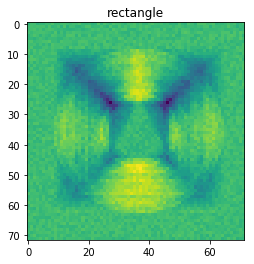

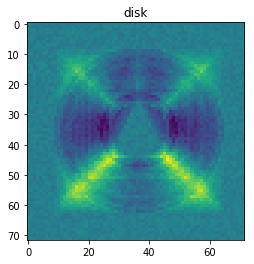

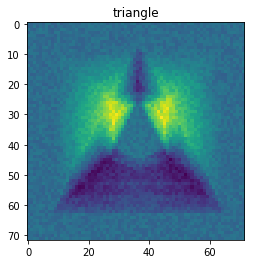

------------- Adam -------------


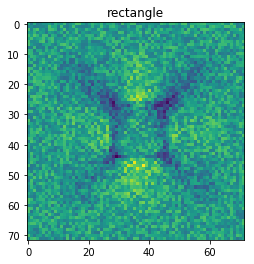

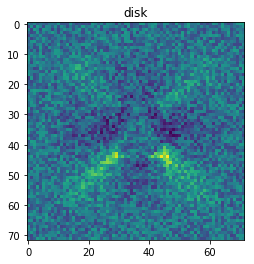

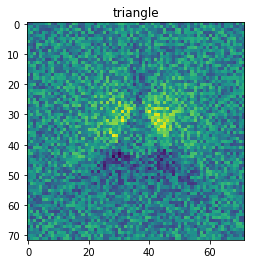

<Figure size 432x288 with 0 Axes>

In [125]:
objects = ['rectangle','disk','triangle']
models = {'SGD':SGD_tuned,'Adam':Adam}

for name, model in models.items():
    print('-------------',name,'-------------')
    for i in range(len(objects)):
        weights = np.array(model.get_weights())[0][:,i].reshape(IMAGE_SIZE,IMAGE_SIZE)
        plt.imshow(weights)
        plt.title(objects[i])
        plt.show()
        plt.clf()

## 5. A More Difficult Classification Problem

For the rest of the exercise, we are going to use Adam optimizer.

### Linear Classifier

In [164]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
Data created


In [165]:
from keras.models import Sequential
from keras.layers import Dense

def model_Class():
    model = Sequential()
    model.add(Dense(3,  input_dim = X_train.shape[1], activation='softmax'))
    return model

In [166]:
Adam = model_Class()
Adam.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])
Adam.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2902 - acc: 0.3000
Epoch 2/30
300/300 [==============================] - 0s 166us/step - loss: 1.6191 - acc: 0.3533
Epoch 3/30
300/300 [==============================] - 0s 198us/step - loss: 1.1299 - acc: 0.4700
Epoch 4/30
300/300 [==============================] - 0s 188us/step - loss: 1.0415 - acc: 0.5233
Epoch 5/30
300/300 [==============================] - 0s 190us/step - loss: 1.1270 - acc: 0.4567
Epoch 6/30
300/300 [==============================] - 0s 256us/step - loss: 0.9412 - acc: 0.5133
Epoch 7/30
300/300 [==============================] - 0s 214us/step - loss: 0.9568 - acc: 0.5133
Epoch 8/30
300/300 [==============================] - 0s 188us/step - loss: 0.9153 - acc: 0.5533
Epoch 9/30
300/300 [==============================] - 0s 236us/step - loss: 0.9941 - acc: 0.5467
Epoch 10/30
300/300 [==============================] - 0s 204us/step - loss: 0.9460 - acc: 0.5700
Epoch 11/30
300/300 [==========

### Convolutional (not-too-)deep network

In [167]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
Data created


In [168]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

def model_Conv():
    model = Sequential()
    model.add(Conv2D(16,(5,5),input_shape=X_train[0].shape,activation='relu'))
    model.add(MaxPooling2D(pool_size=(4,4)))
    model.add(Flatten())
    model.add(Dense(3, input_dim = X_train.shape[1], activation='softmax'))
    return model

In [169]:
Adam_conv = model_Conv()
Adam_conv.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])
Adam_conv.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 2s 6ms/step - loss: 1.1049 - acc: 0.3633
Epoch 2/30
300/300 [==============================] - 0s 1ms/step - loss: 1.0207 - acc: 0.4433
Epoch 3/30
300/300 [==============================] - 1s 2ms/step - loss: 0.9399 - acc: 0.6733
Epoch 4/30
300/300 [==============================] - 1s 2ms/step - loss: 0.8715 - acc: 0.7000
Epoch 5/30
300/300 [==============================] - 1s 2ms/step - loss: 0.7969 - acc: 0.7633
Epoch 6/30
300/300 [==============================] - 0s 1ms/step - loss: 0.7349 - acc: 0.7900
Epoch 7/30
300/300 [==============================] - 1s 2ms/step - loss: 0.6969 - acc: 0.7467
Epoch 8/30
300/300 [==============================] - 1s 2ms/step - loss: 0.6620 - acc: 0.7733
Epoch 9/30
300/300 [==============================] - 1s 2ms/step - loss: 0.6423 - acc: 0.7567
Epoch 10/30
300/300 [==============================] - 0s 2ms/step - loss: 0.6583 - acc: 0.7167
Epoch 11/30
300/300 [============================

### Comparison

In [173]:
[X_test,Y_test] = generate_test_set_classification()
score_Adam = Adam.evaluate(X_test,Y_test, batch_size=32)

X_test = X_test.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
score_Adam_conv = Adam_conv.evaluate(X_test,Y_test, batch_size=32)

print('\n')
print('Linear classifier ---------\nLoss value ',score_Adam[0],'\nAccuracy (%)',score_Adam[1]*100)
print('\n')
print('Convolutional network ---------\nLoss value ',score_Adam_conv[0],'\nAccuracy (%)',score_Adam_conv[1]*100)

Creating data:
Data created
300/300 [==============================] - 0s 480us/step


Linear classifier ---------
Loss value  1.0179532734553018 
Accuracy (%) 51.66666658719381


Convolutional network ---------
Loss value  0.5645191725095113 
Accuracy (%) 77.33333333333333


For the convolutional network, the value of the loss function on the test set is 0.57 and the accuracy is of 77%. It is considerably more tha the simple linear classifier.

## 6. A Regression Problem

### Preparation

In [111]:
[X_train, Y_train] = generate_dataset_regression(1000, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
Data created:
Creating data:
Data created:


### Regressor

In [112]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Conv2D, Flatten, Dropout, MaxPooling2D

def model_Regressor(): #Lighter version of LeNet architecture
    model = Sequential()
    model.add(Reshape((IMAGE_SIZE, IMAGE_SIZE, 1)))
    
    model.add(Conv2D(16,(3,3),input_shape=(X_train[0]).shape,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
      
    model.add(Dense(6, input_dim = X_train.shape[1]**2, activation='linear' ))
    
    return model

In [113]:
Adam_reg = model_Regressor()
Adam_reg.compile(loss='mean_squared_error',optimizer="Adam")
Adam_reg.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4354
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0802
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0590
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0510
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0422
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0362
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0312
Epoch 8/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0263
Epoch 9/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0231
Epoch 10/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0197
Epoch 11/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0179
Epoch 12/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0159
E

Evaluation:

In [114]:
score_reg = Adam_reg.evaluate(X_test,Y_test)

print('\n')
print('Loss value ',score_reg)

300/300 [==============================] - 1s 4ms/step


Loss value  0.1053750483194987


Prediction:


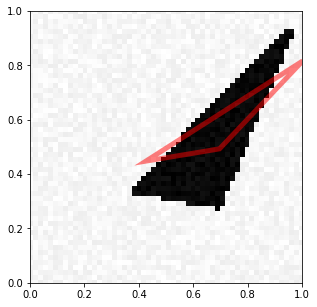

Original:


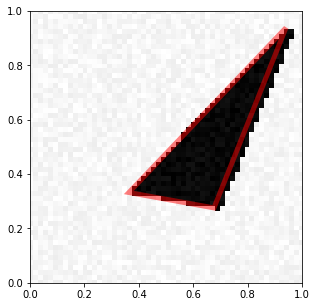

Prediction:


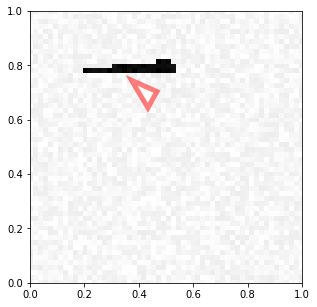

Original:


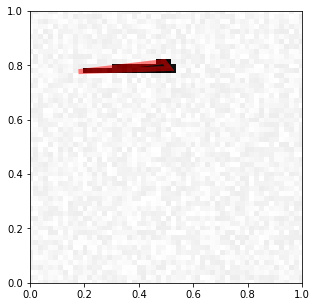

Prediction:


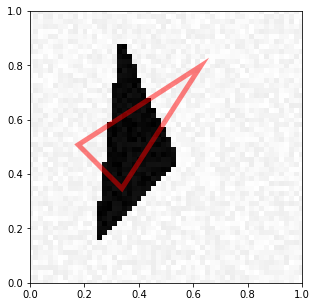

Original:


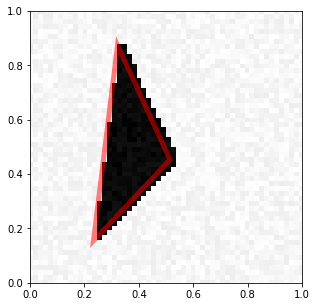

In [115]:
for i in range(3):
    print('Prediction:')
    visualize_prediction(X_test[i],Adam_reg.predict(X_test)[i])
    print('Original:')
    visualize_prediction(X_test[i],Y_test[i])

The model converges, but we can see it's not working very good. Let's optimize the model by tuning the architecture, and engineer the images:

- We will first sort the points by their first axis to turn the relation between the prediction and the points to a bijection:
- We will then add a layer to normalize the batch

### Regressor with feature engineering:

Feature engineering:

In [116]:
def sort(Y):
    Y_new = Y.reshape(Y.shape[0],3,2)
    for i in range(Y.shape[0]):
        Temp = Y_new[i]
        Y_new[i] = Temp[Temp[:,0].argsort()] # no need to sort the other axis as in practice, two numbers are never really equal (same reason why we can use the relu function although it is not differentiable in 0)           
    Y_new = Y_new.reshape(Y_new.shape[0],6)
    return Y_new

Model:

In [117]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Reshape, Conv2D, Flatten, Dropout, MaxPooling2D

def model_Regressor():
    model = Sequential()
    
    model.add(BatchNormalization(input_shape=(IMAGE_SIZE**2,)))
    model.add(Reshape((IMAGE_SIZE, IMAGE_SIZE, 1)))
    
    model.add(Conv2D(16,(3,3),input_shape=(X_train[0]).shape,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(32,(3,3),input_shape=(X_train[0]).shape,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(0.2))    
    model.add(Dense(6, input_dim = X_train.shape[1]**2, activation='linear' ))
    
    return model

Adam_reg = model_Regressor()
Adam_reg.compile(loss='mean_squared_error',optimizer="Adam")
Adam_reg.fit(X_train, sort(Y_train), epochs=30, batch_size=32)

Epoch 1/30
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1475
Epoch 2/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0688
Epoch 3/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0559
Epoch 4/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0477
Epoch 5/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0442
Epoch 6/30
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0399
Epoch 7/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0356
Epoch 8/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0337
Epoch 9/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0327
Epoch 10/30
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0288
Epoch 11/30
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0272
Epoch 12/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0254

Evaluation:

In [118]:
score_reg = Adam_reg.evaluate(X_test,sort(Y_test))

print('\n')
print('Loss value ',score_reg)

300/300 [==============================] - 2s 6ms/step


Loss value  0.01816372834146023


Prediction:


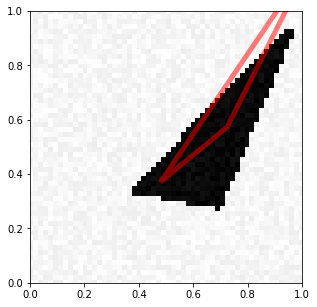

Original:


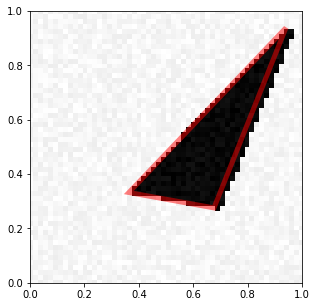

Prediction:


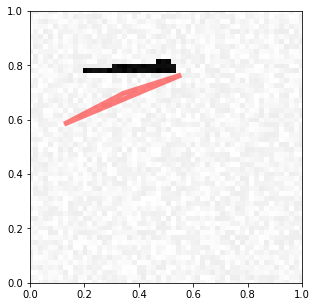

Original:


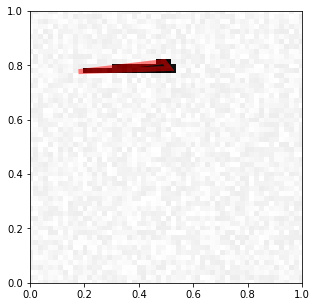

Prediction:


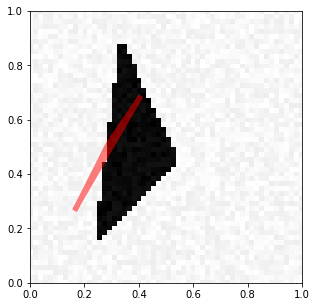

Original:


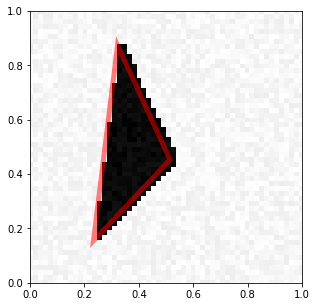

In [119]:
for i in range(3):
    print('Prediction:')
    visualize_prediction(X_test[i],Adam_reg.predict(X_test)[i])
    print('Original:')
    visualize_prediction(X_test[i],Y_test[i])

The detection is now working more effectively, which makes sense: We helped the model by engineering the data to remove informations that should not matter for his prediction.

## 7. Image Denoising

### Dataset generation

In [129]:
def generate_dataset_noising(nb_samples, free_location=False):
    
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    X_noise = np.zeros([nb_samples,im_size])    
    print('Creating data:')
    
    for i in range(nb_samples):
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(0, free_location)
        elif category == 1:
            X[i] = generate_a_disk(0, free_location)
        else:
            [X[i], V] = generate_a_triangle(0, free_location)

        ### Random Noise added ###    
        noise = np.random.randint(50)
        X_noise[i] = X[i] + noise * np.random.random(im_size)
        X_noise[i] = (X_noise[i] + noise) / (255 + 2 * noise)
        ###########################

    X = X/255
    
    print('Data created')
    return [X_noise, X]

def generate_test_set_noising():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_noising(300, True)
    return [X_test, Y_test]

In [131]:
X_train, Y_train=generate_dataset_noising(500,True)
X_test, Y_test=generate_test_set_noising()

Creating data:
Data created
Creating data:
Data created


Visualization:

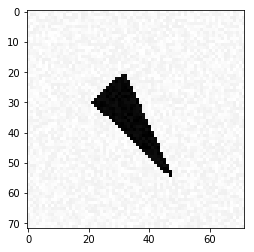

In [133]:
plt.imshow(X_train[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

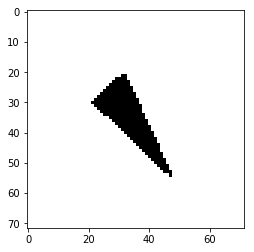

In [134]:
plt.imshow(Y_train[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### Hourglass network

In [150]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Reshape, Conv2D, UpSampling2D, Flatten, Dropout, MaxPooling2D

def model_Hourglass():

    model = Sequential()
    model.add(BatchNormalization(input_shape=(IMAGE_SIZE**2,)))
    model.add(Reshape((IMAGE_SIZE, IMAGE_SIZE, 1)))
    
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(4, 4)))
    
    model.add(UpSampling2D(size=(1, 1)))
    
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(IMAGE_SIZE**2, activation='sigmoid'))
    
    return model

In [151]:
Hourglass = model_Hourglass()
Hourglass.compile(loss='mean_squared_error',optimizer="Adam")
Hourglass.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
500/500 [==============================] - 23s 46ms/step - loss: 0.1020
Epoch 2/30
500/500 [==============================] - 17s 33ms/step - loss: 0.0315
Epoch 3/30
500/500 [==============================] - 11s 22ms/step - loss: 0.0211
Epoch 4/30
500/500 [==============================] - 11s 21ms/step - loss: 0.0162
Epoch 5/30
500/500 [==============================] - 11s 22ms/step - loss: 0.0129
Epoch 6/30
500/500 [==============================] - 13s 26ms/step - loss: 0.0103
Epoch 7/30
500/500 [==============================] - 14s 27ms/step - loss: 0.0085
Epoch 8/30
500/500 [==============================] - 14s 27ms/step - loss: 0.0073
Epoch 9/30
500/500 [==============================] - 12s 24ms/step - loss: 0.0059
Epoch 10/30
500/500 [==============================] - 21s 43ms/step - loss: 0.0049
Epoch 11/30
500/500 [==============================] - 17s 34ms/step - loss: 0.0048
Epoch 12/30
500/500 [==============================] - 15s 31ms/step - loss: 0.0041
E

In [152]:
score_reg = Hourglass.evaluate(X_test,Y_test)

print('\n')
print('Loss value ',score_reg)

300/300 [==============================] - 5s 16ms/step


Loss value  0.009251490185658138


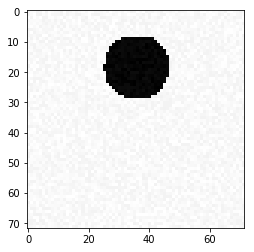

In [153]:
plt.imshow(X_test[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

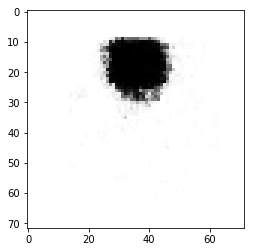

In [154]:
plt.imshow(Hourglass.predict(X_test)[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

We successfuly denoised the image, even though we can see there are many issues at the edges. Optimizing the convolutional layers in order to have an additional focus on edge detection could be a good area of improvement.